In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

D:\swapna python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_data=pd.read_excel(r"C:/Users/Balakrishna/Downloads/archive (1)/Data_Train.xlsx")

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.shape

(10682, 11)

In [11]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# EDA


In [16]:
train_data["journey_day"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [17]:
train_data["journey_month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [18]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [20]:
train_data["dep_hr"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour

train_data["dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.drop(["Dep_Time"],axis=1,inplace=True)



In [21]:
train_data["arvl_hr"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["arvl_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

train_data.drop(["Arrival_Time"],axis=1,inplace=True)


In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [91]:
d=list(train_data["Duration"])
dur_hr=[]
dur_min=[]
for i in range(len(d)):
    x=d[i].split()
    if len(x)!=2:
        if 'h' in d[i]:
            d[i]=d[i].strip() + " 0m"
        else:
            d[i]="0h " + d[i]
            
            
            
for i in range(len(d)):
    x=d[i].split()            
    for j in range(len(x)):
        if 'h' in x[j]:
            a=int(x[j].split(sep='h')[0])
            dur_hr.append(a)
        if 'm' in x[j]:
            b=int(x[j].split(sep='m')[0].split()[-1])
            dur_min.append(b)       
train_data["dur_hrs"]=dur_hr
train_data["dur_mins"]=dur_min

In [93]:
train_data.drop(['Duration'],axis=1,inplace=True)
train_data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [94]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

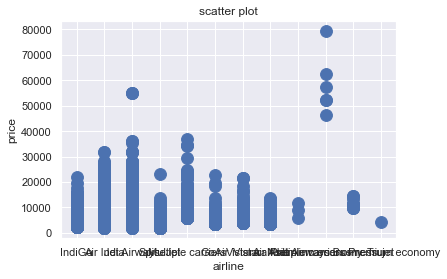

In [102]:
plt.scatter(train_data["Airline"],train_data["Price"],s=140)
plt.title("scatter plot")
plt.xlabel('airline')
plt.ylabel('price')
plt.show()

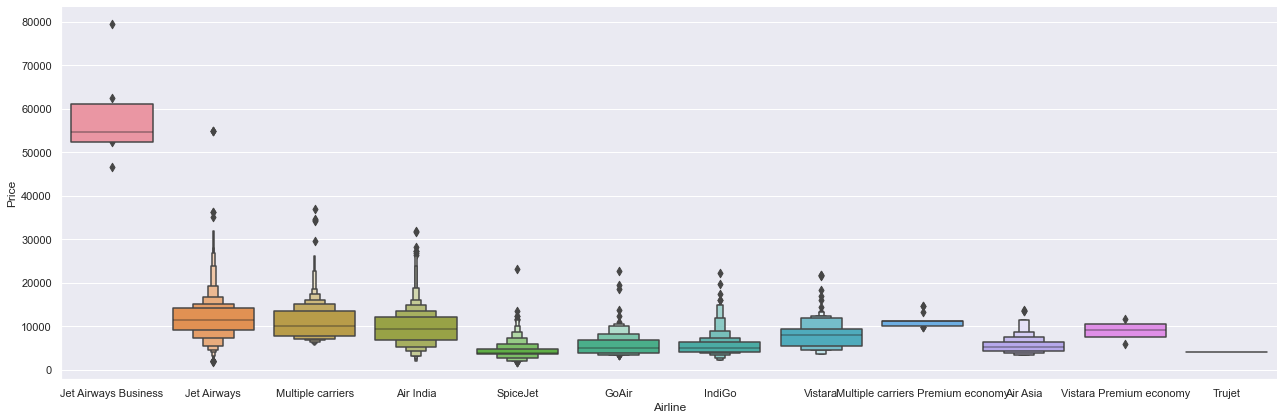

In [103]:
sns.catplot(x="Airline",y="Price",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [154]:
airline=train_data[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


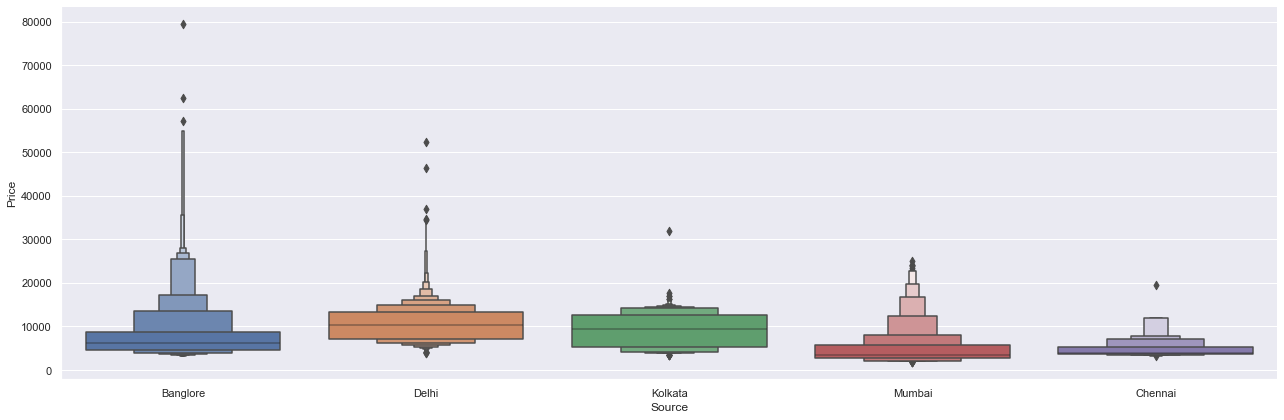

In [155]:
sns.catplot(x="Source",y="Price",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [156]:
src=train_data[["Source"]]
src=pd.get_dummies(src,drop_first=True)
src.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [157]:
dest=train_data[["Destination"]]
dest=pd.get_dummies(dest,drop_first=True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [158]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

KeyError: "['Route', 'Additional_Info'] not found in axis"

In [159]:
train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [160]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [161]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [162]:
data=pd.concat([train_data, airline, src, dest],axis=1)

In [163]:
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [164]:
data.head()

,Total_Stops,Price,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [165]:
data.shape

(10682, 30)

# test data

In [131]:
test=pd.read_excel("C:/Users/Balakrishna/Downloads/archive (1)/Test_set.xlsx")

In [132]:
test.shape

(2671, 10)

In [133]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [134]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [135]:
test["journey_day"]=pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.day
test["journey_month"]=pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [136]:
test["dep_hr"]=pd.to_datetime(test["Dep_Time"]).dt.hour

test["dep_min"]=pd.to_datetime(test["Dep_Time"]).dt.minute

In [137]:
test["arvl_hr"]=pd.to_datetime(test["Arrival_Time"]).dt.hour
test["arvl_min"]=pd.to_datetime(test["Arrival_Time"]).dt.minute

test.drop(["Arrival_Time","Dep_Time","Date_of_Journey"],axis=1,inplace=True)

In [138]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [139]:
d=list(test["Duration"])
dur_hr=[]
dur_min=[]
for i in range(len(d)):
    x=d[i].split()
    if len(x)!=2:
        if 'h' in d[i]:
            d[i]=d[i].strip() + " 0m"
        else:
            d[i]="0h " + d[i]
            
            
            
for i in range(len(d)):
    x=d[i].split()            
    for j in range(len(x)):
        if 'h' in x[j]:
            a=int(x[j].split(sep='h')[0])
            dur_hr.append(a)
        if 'm' in x[j]:
            b=int(x[j].split(sep='m')[0].split()[-1])
            dur_min.append(b)       
test["dur_hrs"]=dur_hr
test["dur_mins"]=dur_min

In [140]:
test.drop(['Duration'],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [174]:
sr=test[["Source"]]
sr=pd.get_dummies(sr,drop_first=True)
sr.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [145]:
dst=test[["Destination"]]
dst=pd.get_dummies(dst,drop_first=True)
dst.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [166]:
aline=test[["Airline"]]
aline=pd.get_dummies(aline,drop_first=True)
aline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [167]:
test.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [175]:
test_data=pd.concat([test,aline,sr,dst],axis=1)

In [176]:
test_data.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [179]:
test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [180]:
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [181]:
test_data.head()

,Total_Stops,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [182]:
test_data.shape

(2671, 28)

# fs

In [183]:
data.shape

(10682, 30)

In [185]:
data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hr',
       'dep_min', 'arvl_hr', 'arvl_min', 'dur_hrs', 'dur_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [199]:
X=data.loc[:,['Total_Stops', 'journey_day', 'journey_month', 'dep_hr',
       'dep_min', 'arvl_hr', 'arvl_min', 'dur_hrs', 'dur_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y=data.iloc[:,1]

In [200]:
X.head()

,Total_Stops,journey_day,journey_month,dep_hr,dep_min,arvl_hr,arvl_min,dur_hrs,dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [201]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\Balakrishna\AppData\Local\Temp\ipykernel_8380\1413740358.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")


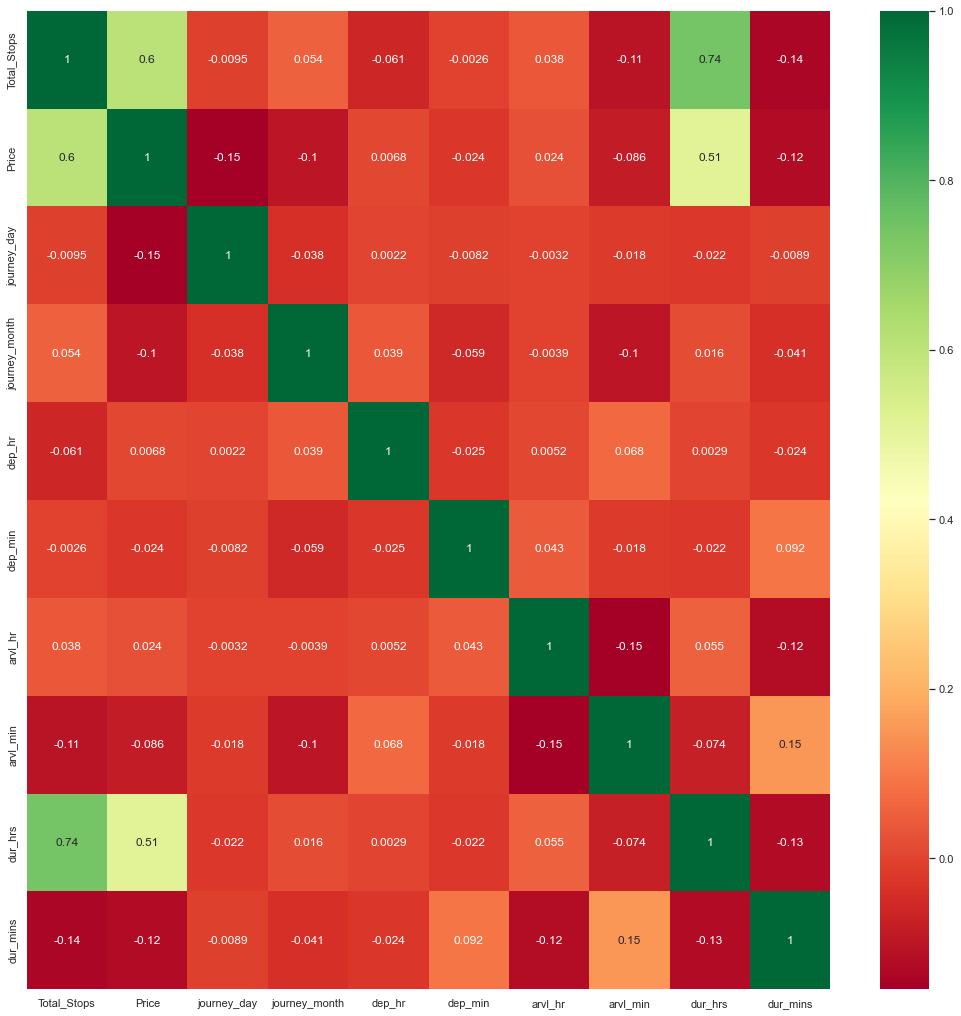

In [198]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [202]:
from sklearn.ensemble import ExtraTreesRegressor
select=ExtraTreesRegressor()
select.fit(X,y)

ExtraTreesRegressor()

In [203]:
print(select.feature_importances_)

[2.11048490e-01 1.43850588e-01 5.27330096e-02 2.42461497e-02
 2.13066284e-02 2.78657674e-02 1.94489242e-02 1.34051413e-01
 1.75046110e-02 1.10977639e-02 1.69014982e-03 1.78428020e-02
 1.37602744e-01 6.83373159e-02 1.81990693e-02 8.50858924e-04
 2.78639909e-03 1.10281736e-04 4.71646357e-03 7.69452920e-05
 4.07531821e-04 1.70434307e-02 3.37843595e-03 6.21396861e-03
 9.84225073e-03 1.59973898e-02 6.35023644e-03 4.63038449e-04
 2.49373427e-02]


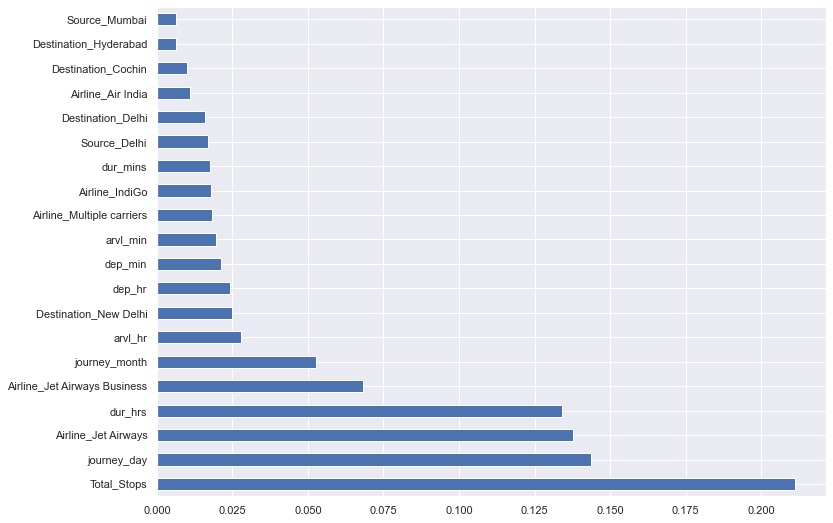

In [204]:
plt.figure(figsize=(12,9))
feat_imp=pd.Series(select.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=None)

In [206]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
rfreg.fit(X_train,y_train)

RandomForestRegressor()

In [208]:
y_pred=rfreg.predict(X_test)
y_pred

array([11560.19 , 11446.406,  8465.58 , ...,  4931.07 ,  7647.245,
        8608.65 ])

In [209]:
rfreg.score(X_train,y_train)

0.9527141646041628

In [210]:
rfreg.score(X_test,y_test)

0.8139549770734917

D:\swapna python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


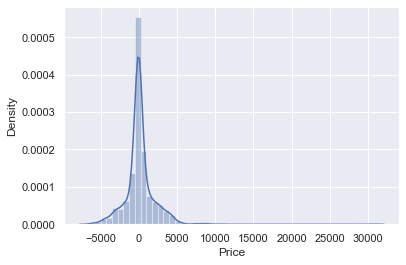

In [212]:
sns.distplot(y_test-y_pred)
plt.show()

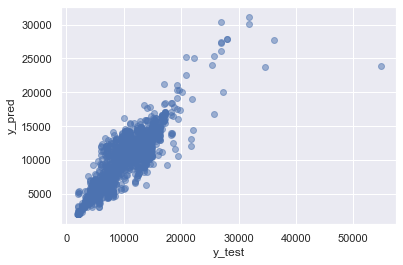

In [213]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [214]:
from sklearn import metrics

In [215]:
print("mae:",metrics.mean_absolute_error(y_test,y_pred))
print("mse:",metrics.mean_squared_error(y_test,y_pred))
print("rmse:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mae: 1152.0674294816608
mse: 3691146.6677521425
rmse: 1921.2357137405454


In [216]:
metrics.r2_score(y_test,y_pred)

0.8139549770734917

# hyper parameter tuning

In [217]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [227]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [228]:
rfrand=RandomizedSearchCV(estimator=rfreg,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [229]:
rfrand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [230]:
rfrand.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [231]:
prediction=rfrand.predict(X_test)

D:\swapna python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


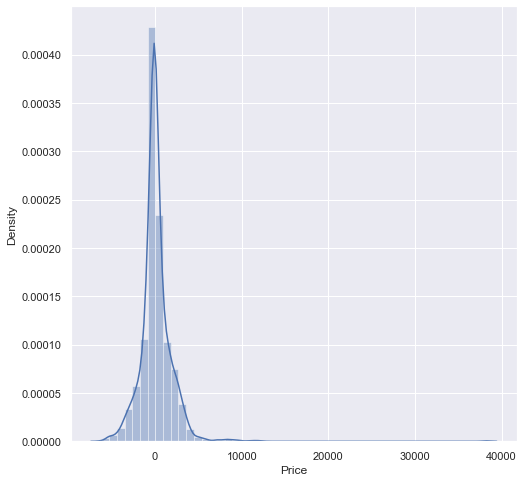

In [232]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

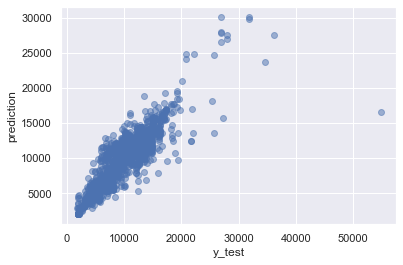

In [233]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [234]:
print("mae:",metrics.mean_absolute_error(y_test,prediction))
print("mse:",metrics.mean_squared_error(y_test,prediction))
print("rmse:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

mae: 1125.5373994470544
mse: 3585012.8389408723
rmse: 1893.4130133018714


save the model to reuse

In [239]:
import pickle
file=open("flight_pprf.pkl",'wb')
pickle.dump(rfrand,file)


In [240]:
model=open("flight_pprf.pkl",'rb')
forest=pickle.load(model)

In [241]:
y_prediction=forest.predict(X_test)

In [242]:
metrics.r2_score(y_test,y_prediction)

0.8193044449738003